## Recupera os dados analisados e tratados, treina o modelo, fazendo a clusterização da qualidade do ar.

In [91]:
# importa bibliotecas
import pandas as pd

from sklearn.pipeline import Pipeline # permite uma sequência de estágios a serem executados
from sklearn.cluster import KMeans # algorítmo de clusterização
from sklearn.decomposition import PCA # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                      # ajuda a evitar overfiting do modelo

from auxiliary_functions import plot_elbow_silhouette    
from auxiliary_functions import plot_columns_percent_hue_cluster
from pandasql import sqldf                    

pd.set_option('display.max_rows', None) # libera a exibição de todas as linhas 
pd.set_option('display.max_columns', None) # libera a exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe a exibição de advertências de warning

In [92]:
# carregando arquivo tratado em dataframe
df_quality = pd.read_csv('arquivos_tratados/df_quality_trans.csv')

In [93]:
# conferindo a dimensão do dataframe, linhas e colunas
df_quality.shape

(5296, 54)

In [94]:
df_quality = df_quality.sort_index()

In [95]:
df_quality.head(3)

CO/hr  C6H6-micgr/m3/hr  NMHC/hr  NOx-ppb/hr  NOx/hr  NO2-micgr/m3/hr  \
0  1473.0              14.3   1127.0       224.0   831.0            152.0   
1  1379.0              12.5   1068.0       171.0   899.0            139.0   
2  1385.0              12.2   1056.0       149.0   891.0            133.0   

   NO2/hr   O3/hr  temperatura°C  umidade_relativa  umidade_absoluta  \
0  1752.0  1568.0           20.8              34.4            0.8365   
1  1663.0  1374.0           23.8              28.2            0.8219   
2  1648.0  1268.0           24.2              28.7            0.8515   

   dia_semana  hour  one-hot__dia_semana_0.0  one-hot__dia_semana_1.0  \
0         3.0  11.0                      0.0                      0.0   
1         3.0  12.0                      0.0                      0.0   
2         3.0  13.0                      0.0                      0.0   

   one-hot__dia_semana_2.0  one-hot__dia_semana_3.0  one-hot__dia_semana_4.0  \
0                      0.0                      1.0                      0.0   
1                      0.0                      1.0                      0.0   
2                      0.0                      1.0                      0.0   

   one-hot__dia_semana_5.0  one-hot__dia_semana_6.0  one-hot__hour_0.0  \
0                      0.0                      0.0                0.0   
1                      0.0                      0.0                0.0   
2                      0.0                      0.0                0.0   

   one-hot__hour_1.0  one-hot__hour_2.0  one-hot__hour_4.0  one-hot__hour_5.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   

   one-hot__hour_6.0  one-hot__hour_7.0  one-hot__hour_8.0  one-hot__hour_9.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   

   one-hot__hour_10.0  one-hot__hour_11.0  one-hot__hour_12.0  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_13.0  one-hot__hour_14.0  one-hot__hour_15.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   

   one-hot__hour_16.0  one-hot__hour_17.0  one-hot__hour_18.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_19.0  one-hot__hour_20.0  one-hot__hour_21.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   

   one-hot__hour_22.0  one-hot__hour_23.0  minmax__CO/hr  \
0                 0.0                 0.0       0.979344   
1                 0.0                 0.0       0.865128   
2                 0.0                 0.0       0.872418   

   minmax__C6H6-micgr/m3/hr  minmax__NMHC/hr  minmax__NOx-ppb/hr  \
0                  0.623853         0.736080            0.413408   
1                  0.541284         0.670379            0.314711   
2                  0.527523         0.657016            0.273743   

   minmax__NOx/hr  minmax__NO2-micgr/m3/hr  minmax__NO2/hr  minmax__O3/hr  \
0        0.460571                 0.704225        0.663018       0.837333   
1        0.538286                 0.643192        0.611751       0.708000   
2        0.529143                 0.615023        0.6031

In [96]:
list(df_quality.columns)

['CO/hr',
 'C6H6-micgr/m3/hr',
 'NMHC/hr',
 'NOx-ppb/hr',
 'NOx/hr',
 'NO2-micgr/m3/hr',
 'NO2/hr',
 'O3/hr',
 'temperatura°C',
 'umidade_relativa',
 'umidade_absoluta',
 'dia_semana',
 'hour',
 'one-hot__dia_semana_0.0',
 'one-hot__dia_semana_1.0',
 'one-hot__dia_semana_2.0',
 'one-hot__dia_semana_3.0',
 'one-hot__dia_semana_4.0',
 'one-hot__dia_semana_5.0',
 'one-hot__dia_semana_6.0',
 'one-hot__hour_0.0',
 'one-hot__hour_1.0',
 'one-hot__hour_2.0',
 'one-hot__hour_4.0',
 'one-hot__hour_5.0',
 'one-hot__hour_6.0',
 'one-hot__hour_7.0',
 'one-hot__hour_8.0',
 'one-hot__hour_9.0',
 'one-hot__hour_10.0',
 'one-hot__hour_11.0',
 'one-hot__hour_12.0',
 'one-hot__hour_13.0',
 'one-hot__hour_14.0',
 'one-hot__hour_15.0',
 'one-hot__hour_16.0',
 'one-hot__hour_17.0',
 'one-hot__hour_18.0',
 'one-hot__hour_19.0',
 'one-hot__hour_20.0',
 'one-hot__hour_21.0',
 'one-hot__hour_22.0',
 'one-hot__hour_23.0',
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',


In [97]:
colunas_og =[
 'CO/hr',
 'C6H6-micgr/m3/hr',
 'NMHC/hr',
 'NOx-ppb/hr',
 'NOx/hr',
 'NO2-micgr/m3/hr',
 'NO2/hr',
 'O3/hr',
 'temperatura°C',
 'umidade_relativa',
 'umidade_absoluta',
 'dia_semana',
 'hour',
]

colunas_trans = [
 'one-hot__dia_semana_0.0',
 'one-hot__dia_semana_1.0',
 'one-hot__dia_semana_2.0',
 'one-hot__dia_semana_3.0',
 'one-hot__dia_semana_4.0',
 'one-hot__dia_semana_5.0',
 'one-hot__dia_semana_6.0',
 'one-hot__hour_0.0',
 'one-hot__hour_1.0',
 'one-hot__hour_2.0',
 'one-hot__hour_4.0',
 'one-hot__hour_5.0',
 'one-hot__hour_6.0',
 'one-hot__hour_7.0',
 'one-hot__hour_8.0',
 'one-hot__hour_9.0',
 'one-hot__hour_10.0',
 'one-hot__hour_11.0',
 'one-hot__hour_12.0',
 'one-hot__hour_13.0',
 'one-hot__hour_14.0',
 'one-hot__hour_15.0',
 'one-hot__hour_16.0',
 'one-hot__hour_17.0',
 'one-hot__hour_18.0',
 'one-hot__hour_19.0',
 'one-hot__hour_20.0',
 'one-hot__hour_21.0',
 'one-hot__hour_22.0',
 'one-hot__hour_23.0',
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',
 'minmax__NOx/hr',
 'minmax__NO2-micgr/m3/hr',
 'minmax__NO2/hr',
 'minmax__O3/hr',
 'minmax__temperatura°C',
 'minmax__umidade_relativa',
 'minmax__umidade_absoluta',
 ]

In [98]:
df_quality_trans = df_quality[colunas_trans]
df_quality = df_quality[colunas_og]

In [99]:
print(df_quality_trans.info())
print(df_quality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   one-hot__dia_semana_0.0   5296 non-null   float64
 1   one-hot__dia_semana_1.0   5296 non-null   float64
 2   one-hot__dia_semana_2.0   5296 non-null   float64
 3   one-hot__dia_semana_3.0   5296 non-null   float64
 4   one-hot__dia_semana_4.0   5296 non-null   float64
 5   one-hot__dia_semana_5.0   5296 non-null   float64
 6   one-hot__dia_semana_6.0   5296 non-null   float64
 7   one-hot__hour_0.0         5296 non-null   float64
 8   one-hot__hour_1.0         5296 non-null   float64
 9   one-hot__hour_2.0         5296 non-null   float64
 10  one-hot__hour_4.0         5296 non-null   float64
 11  one-hot__hour_5.0         5296 non-null   float64
 12  one-hot__hour_6.0         5296 non-null   float64
 13  one-hot__hour_7.0         5296 non-null   float64
 14  one-hot_

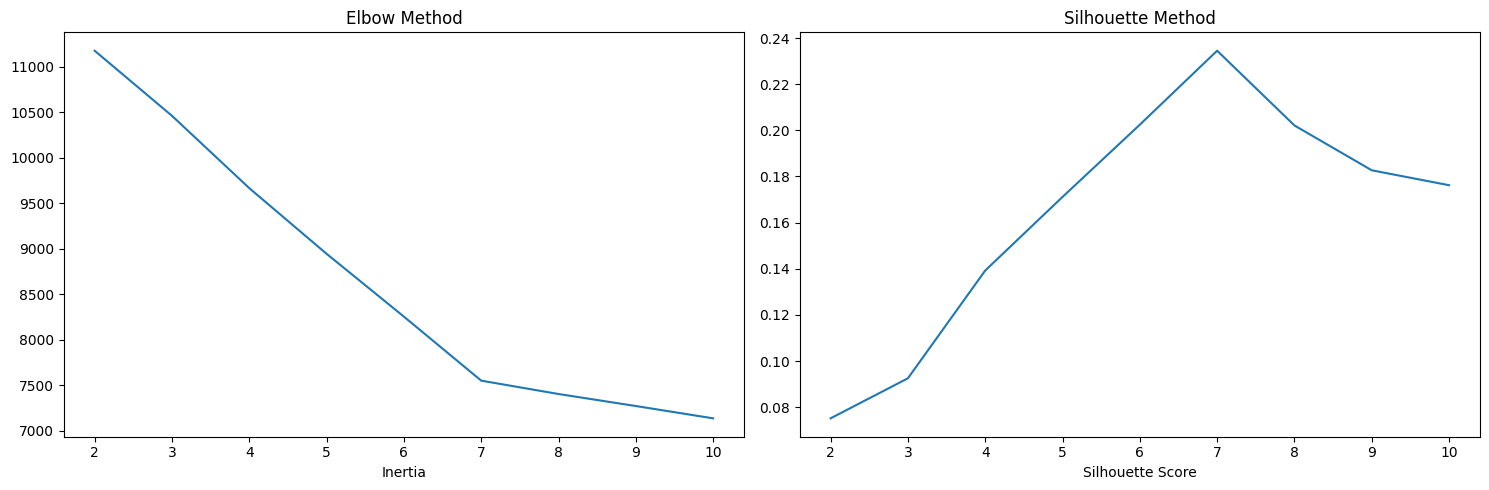

In [100]:
# gera os gráficos para definir a quantidade de clusters a serem considerados, usando os métodos
# do COTOVELO e da SILHUETA - aqui definido que o melhor tamanho de cluster será de 3
plot_elbow_silhouette(df_quality_trans)

- Pelo método do cotovelo e da silhueta verificamos que existe em comum um cotovelo na posição 3 em ambos os gráficos, sendo essa a quantidade escolhida para a formação dos clusters

In [101]:
# definindo o pipeline com pca e kmeans e gerando os clusters do modelo salvando o modelo na variável kmeans_air_quality
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=RANDOM_STATE)), # reduz o nro de variáveis para otimizar o algorítmo do modelo
                                                                 # ajuda a evitar overfiting do modelo
                                                                 # n_components=2 nro de componentes que serão mantidos
        ("clustering", KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=10))
                                                                 # clusteriza os acidentes aéreos
                                                                 # n_cluster=3 qtde de clusters que serão criados
                                                                 # n_init=10 nro de vezes de execução com diferentes combinações
                                                                 # do centróide

                                                                 # random_state nro da instância gerada e conservada
    ]
)

kmeans_air_quality = pipeline.fit(df_quality_trans) # faz o treinamento do modelo e já cria os clusters

- Nessa célula é definido uma instância do pipeline contendo a configuração necessária para o pca e para o algorítmo do KMeans. Esse modelo recebe o treinamento e gera os clusters dos acidentes aeronáuticos, ao mesmo tempo salvamos o modelo configurado na variável kmeans_air_quality que será gravada em arquivo .pkl no final desse módulo.

In [102]:
# mostra a configuração do modelo de clusterização kmeans_air_quality
kmeans_air_quality

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [103]:
# mostrando os nomes de recursos de saída dos clusters
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [104]:
# mostrando os labels de dados dos clusters
pipeline["clustering"].labels_

array([0, 0, 0, ..., 2, 2, 2])

In [105]:
# associando os dados transformados com a coluna de clusters criados
df_clustered = df_quality_trans.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

one-hot__dia_semana_0.0  one-hot__dia_semana_1.0  one-hot__dia_semana_2.0  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   one-hot__dia_semana_3.0  one-hot__dia_semana_4.0  one-hot__dia_semana_5.0  \
0                      1.0                      0.0                      0.0   
1                      1.0                      0.0                      0.0   
2                      1.0                      0.0                      0.0   
3                      1.0                      0.0                      0.0   
4                      1.0                      0.0                      0.0   

   one-hot__dia_semana_6.0  one-hot__hour_0.0  one-hot__hour_1.0  \
0                      0.0                0.0                0.0   
1                      0.0                0.0                0.0   
2                      0.0                0.0                0.0   
3                      0.0                0.0                0.0   
4                      0.0                0.0                0.0   

   one-hot__hour_2.0  one-hot__hour_4.0  one-hot__hour_5.0  one-hot__hour_6.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   one-hot__hour_7.0  one-hot__hour_8.0  one-hot__hour_9.0  \
0                0.0                0.0                0.0   
1                0.0                0.0                0.0   
2                0.0                0.0                0.0   
3                0.0                0.0                0.0   
4                0.0                0.0                0.0   

   one-hot__hour_10.0  one-hot__hour_11.0  one-hot__hour_12.0  \
0                 0.0                 1.0                 0.0   
1                 0.0                 0.0                 1.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_13.0  one-hot__hour_14.0  one-hot__hour_15.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 1.0                 0.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 0.0                 1.0   

   one-hot__hour_16.0  one-hot__hour_17.0  one-hot__hour_18.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_19.0  one-hot__hour_20.0  one-hot__hour_21.0  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_22.0  one-hot__hour_23.0  minmax__CO/hr  \
0                 0.0                 0.0       0.979344   
1                 0.0                 0.0       0.865128   
2                 0.0       

In [106]:
# verificando a quantidade de linhas(acidentes) para cada cluster associado
df_clustered["cluster"].value_counts()

cluster
1    2261
0    2190
2     845
Name: count, dtype: int64

- Observamos uma quantidade bem distribuida de acidentes aeronáuticos entre os 3 clusters criados.

In [107]:
# cria e carrega a coluna de clusters para o dataframe com os dados categóricos e numéricos originais
df_quality['cluster'] = df_clustered['cluster']

- Aqui estamos fazendo uma associação dos clusters criados com os dados originais para que possamos levantar algumas estatísticas percentuais e em seguida caracterizar cada cluster.

In [108]:
# visualizando as primeiras linhas do dataframe de dados originais com seus clusters associados
df_quality.head(5)

CO/hr  C6H6-micgr/m3/hr  NMHC/hr  NOx-ppb/hr  NOx/hr  NO2-micgr/m3/hr  \
0  1473.0              14.3   1127.0       224.0   831.0            152.0   
1  1379.0              12.5   1068.0       171.0   899.0            139.0   
2  1385.0              12.2   1056.0       149.0   891.0            133.0   
3  1379.0              13.1   1087.0       137.0   901.0            126.0   
4  1322.0              14.4   1129.0       149.0   934.0            128.0   

   NO2/hr   O3/hr  temperatura°C  umidade_relativa  umidade_absoluta  \
0  1752.0  1568.0           20.8              34.4            0.8365   
1  1663.0  1374.0           23.8              28.2            0.8219   
2  1648.0  1268.0           24.2              28.7            0.8515   
3  1660.0  1144.0           25.2              24.9            0.7829   
4  1639.0  1109.0           27.0              17.8            0.6275   

   dia_semana  hour  cluster  
0         3.0  11.0        0  
1         3.0  12.0        0  
2         3.0  13.0        0  
3         3.0  14.0        0  
4         3.0  15.0        0

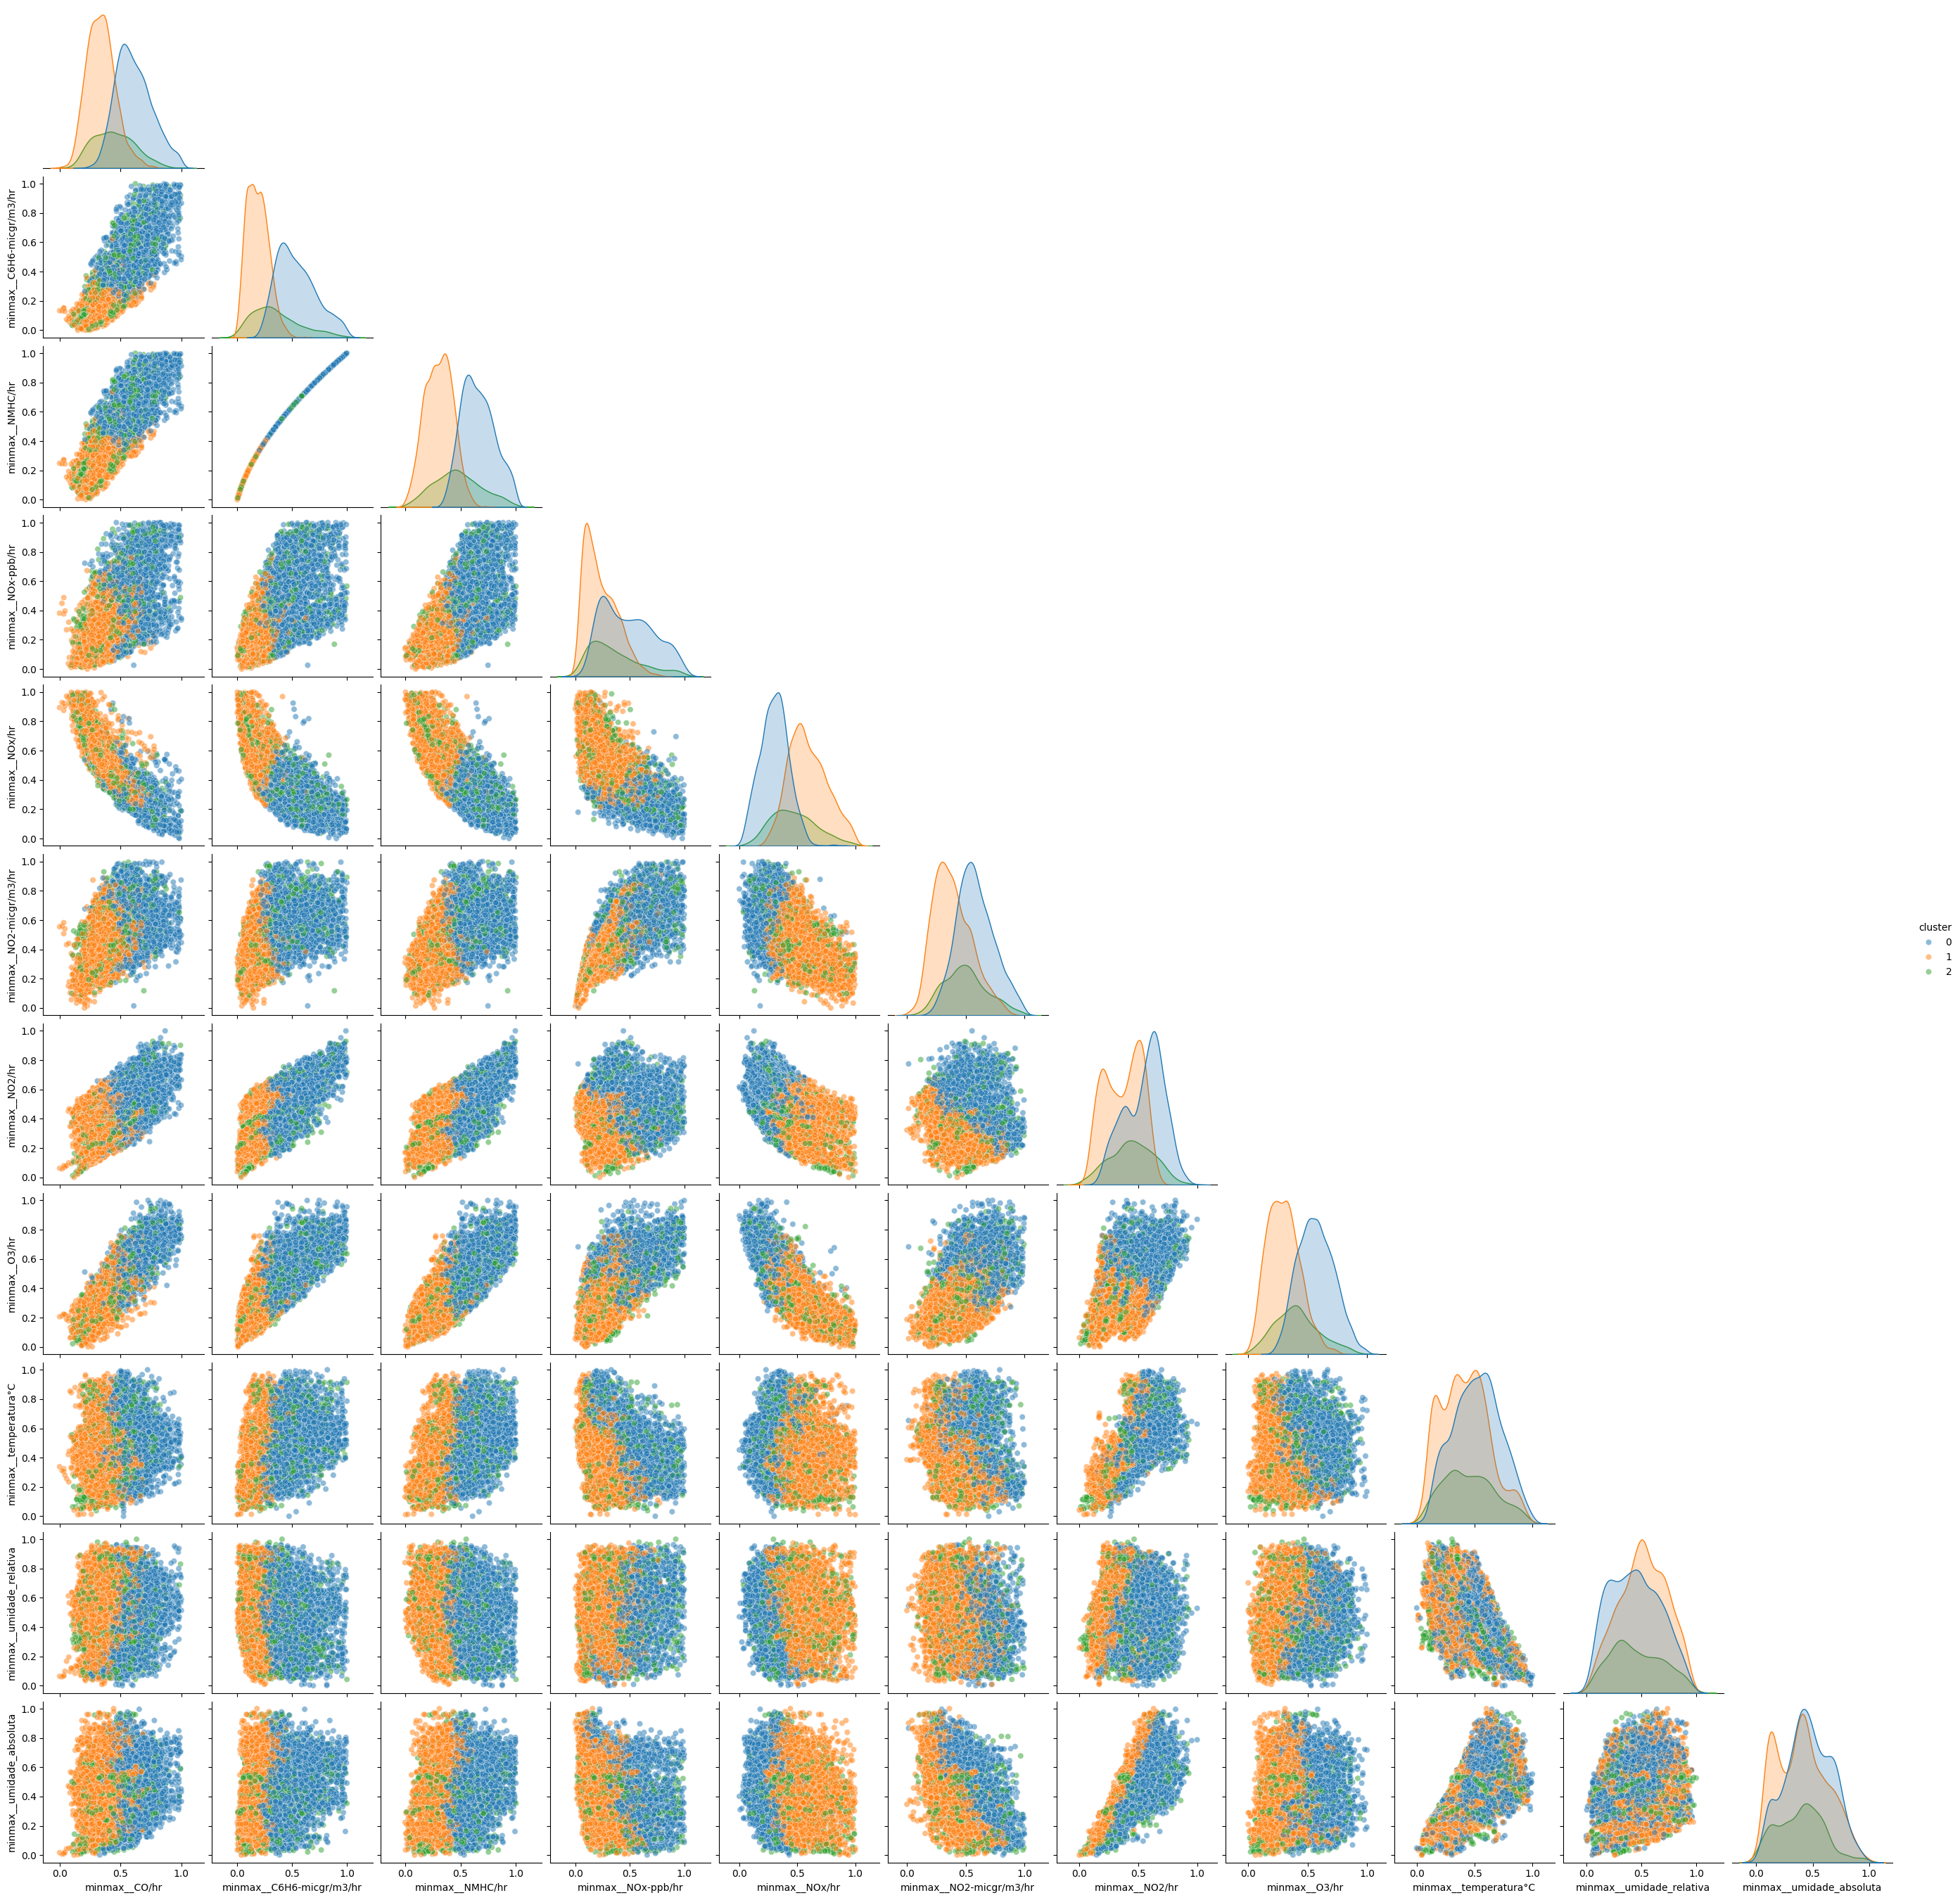

In [109]:
# plotando a distribuição dos dados numéricos agrupados em seus devidos clusters
columns_analysis = [
 'minmax__CO/hr',
 'minmax__C6H6-micgr/m3/hr',
 'minmax__NMHC/hr',
 'minmax__NOx-ppb/hr',
 'minmax__NOx/hr',
 'minmax__NO2-micgr/m3/hr',
 'minmax__NO2/hr',
 'minmax__O3/hr',
 'minmax__temperatura°C',
 'minmax__umidade_relativa',
 'minmax__umidade_absoluta',
 ]
from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

- Plotando a distribuição dos dados numéricos por cluster observamos uma distribuição bastante uniforme nos clusters criados.

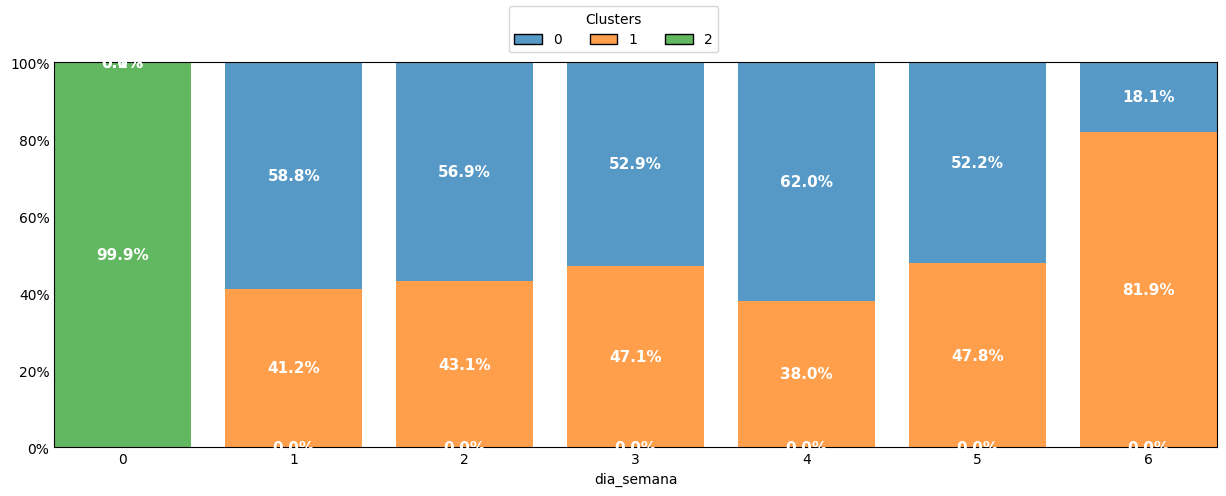

In [110]:
# plotando os percentuais de participação de cada cluster por categoria dos dados originais
# 0 = segunda-feira
plot_columns_percent_hue_cluster(
    dataframe=df_quality,
    columns=['dia_semana'],
    rows_cols=(1, 1),
    figsize=(15, 5),
    column_cluster="cluster", 
    palette='tab10'
)

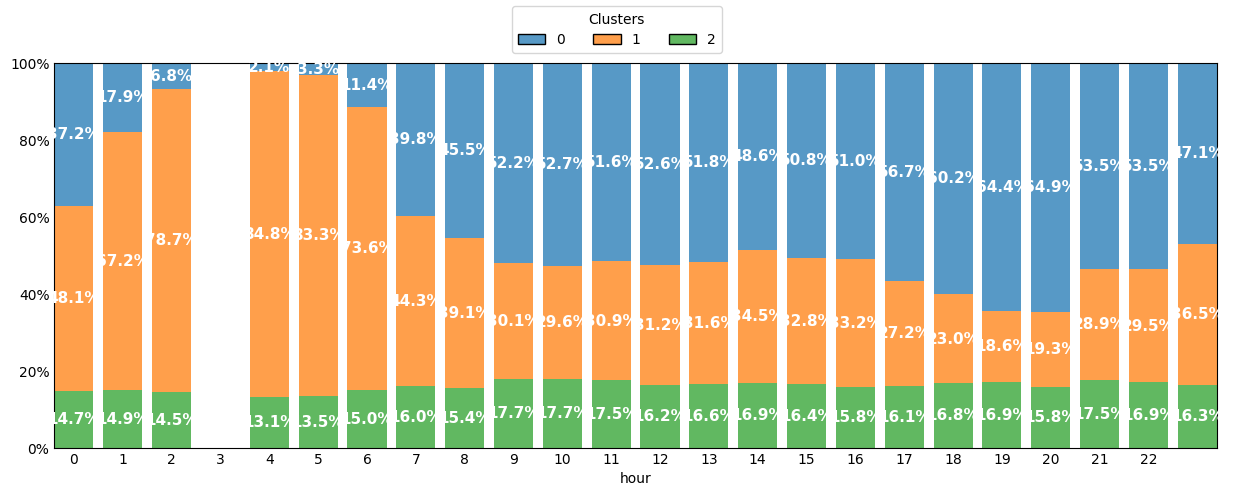

In [111]:
# plotando os percentuais de participação de cada cluster por categoria dos dados originais
plot_columns_percent_hue_cluster(
    dataframe=df_quality,
    columns=['hour'],
    rows_cols=(1, 1),
    figsize=(15, 5),
    column_cluster="cluster", 
    palette='tab10'
)

In [112]:
df_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5296 entries, 0 to 5295
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO/hr             5296 non-null   float64
 1   C6H6-micgr/m3/hr  5296 non-null   float64
 2   NMHC/hr           5296 non-null   float64
 3   NOx-ppb/hr        5296 non-null   float64
 4   NOx/hr            5296 non-null   float64
 5   NO2-micgr/m3/hr   5296 non-null   float64
 6   NO2/hr            5296 non-null   float64
 7   O3/hr             5296 non-null   float64
 8   temperatura°C     5296 non-null   float64
 9   umidade_relativa  5296 non-null   float64
 10  umidade_absoluta  5296 non-null   float64
 11  dia_semana        5296 non-null   float64
 12  hour              5296 non-null   float64
 13  cluster           5296 non-null   int32  
dtypes: float64(13), int32(1)
memory usage: 558.7 KB


In [113]:
df_quality.columns = [
 'CO_hr',
 'C6H6_micgr_m3_hr',
 'NMHC_hr',
 'NOx_ppb_hr',
 'NOx_hr',
 'NO2_micgr_m3_hr',
 'NO2_hr',
 'O3_hr',
 'temperatura°C',
 'umidade_relativa',
 'umidade_absoluta',
 'dia_semana',
 'hour',
 'cluster'
]

In [114]:
# agrupa as quantidades das categorias por cluster
df_catclus = sqldf(" select cluster, sum(CO_hr) as CO_hr, sum(C6H6_micgr_m3_hr) as C6H6_micgr_m3_hr, " \
                        "            sum(NMHC_hr) as NMHC_hr,   sum(NOx_ppb_hr) as NOx_ppb_hr, " \
                        "            sum(NOx_hr) as NOx_hr,   sum(NO2_micgr_m3_hr) as NO2_micgr_m3_hr, " \
                        "            sum(NO2_hr) as NO2_hr, sum(O3_hr) as O3_hr, " \
                        "            avg(temperatura°C)*10000 as temperatura°C, avg(umidade_relativa)*10000 as umidade_relativa, " \
                        "            avg(umidade_absoluta)*10000 as umidade_absoluta " \
                        " from df_quality " \
                        " group by cluster" \
                        " order by cluster"
      )

   cluster      CO_hr  C6H6_micgr_m3_hr    NMHC_hr  NOx_ppb_hr     NOx_hr  \
0        0  2558787.0           27339.0  2316183.0    576736.0  1514952.0   
1        1  2140902.0           10702.2  1670811.0    287558.0  2138321.0   
2        2   874668.0            7121.8   755117.0    166706.0   710563.0   

   NO2_micgr_m3_hr     NO2_hr      O3_hr  temperatura°C  umidade_relativa  \
0         275495.0  3421661.0  2554656.0  215934.703196     447515.068493   
1         190398.0  2813002.0  1711554.0  169806.722689     502613.887660   
2          91449.0  1162395.0   783713.0  186004.733728     458539.644970   

   umidade_absoluta  
0      11091.812785  
1       9918.607696  
2       9696.072189  


<Axes: title={'center': 'Categorias Agrupadas por Cluster'}, xlabel='cluster'>

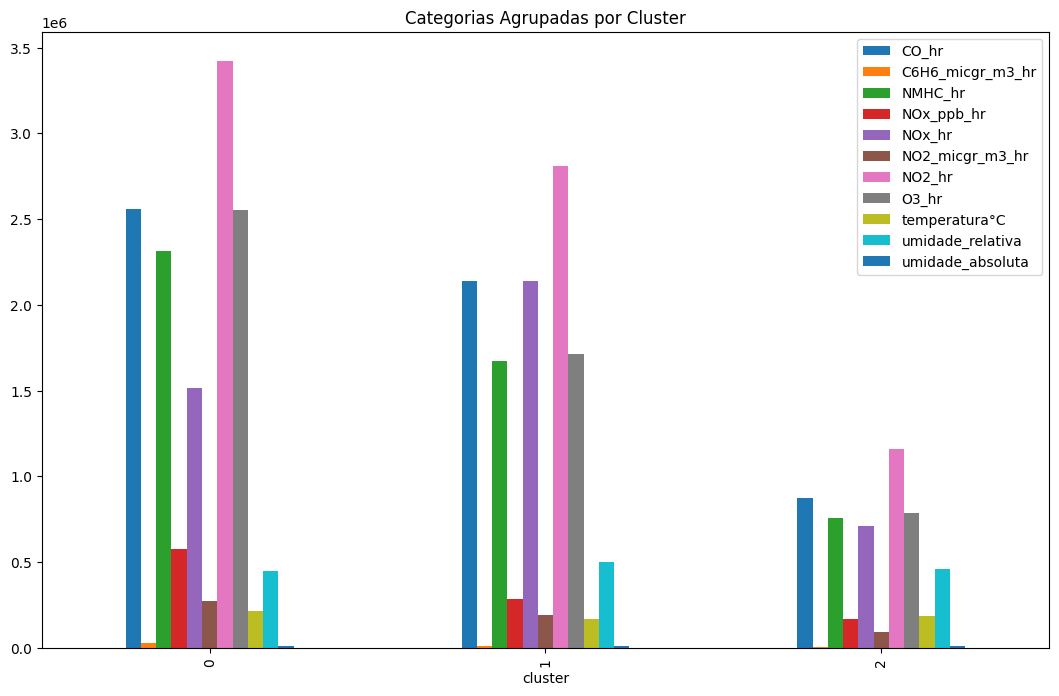

In [115]:
# verifica a quantidade de ocorrências de cada categoria para caracterizar o cluster
print(df_catclus) 

df_catclus.plot(x='cluster', 
        kind='bar', 
        stacked=False, 
        title='Categorias Agrupadas por Cluster',
        figsize=(13,8))

Análise dos Clusters:
- Cluster_0
    - qualidade ruim

- Cluster_1
    - qualidade média

- Cluster_2
    - qualidade boa

- Através das plotagens de percentuais dos dados categóricos originais agrupando por clusters e categorias, foi possível fazer uma caracterização e identificação de cada cluster aos quais cada ocorrência de acidente aeronáutico foi associado.

In [116]:
# mostrando a configuração do pca e kmeans do pipeline executado
pipeline

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

In [117]:
# motrando a configuração do pca do pipeline executado
pipeline[:-1]

Pipeline(steps=[('pca', PCA(n_components=2, random_state=42))])

In [118]:
# mostrando os nomes de recursos de saída dos pcas
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

In [119]:
# reduzindo o nro de variáveis para otimizar o algorítmo do modelo com fit_transform utilizando 
# o pca definido no pipeline
# atribuindo o nome das colunas com get_feature_names_out
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df_quality_trans),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

pca0      pca1
0  0.685163 -0.113104
1  0.483138 -0.098652
2  0.431064 -0.095828
3  0.412427 -0.089785
4  0.427246 -0.078713

In [120]:
# movendo as coordenadas dos centróides dos clusters que serão plotados posteriormente
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 0.44323797, -0.14838404],
       [-0.41914803, -0.18052945],
       [-0.03333936,  0.86739087]])

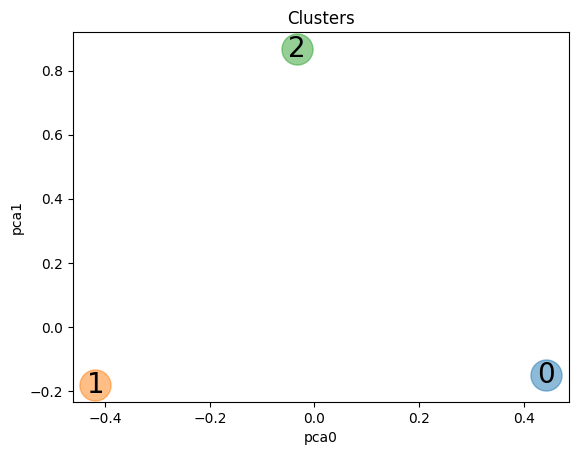

In [121]:
# plotando os centróides dos clusters para posteriormente visualizarmos a distribuição em torno dos mesmos
from auxiliary_functions import plot_clusters_2D

plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids
)

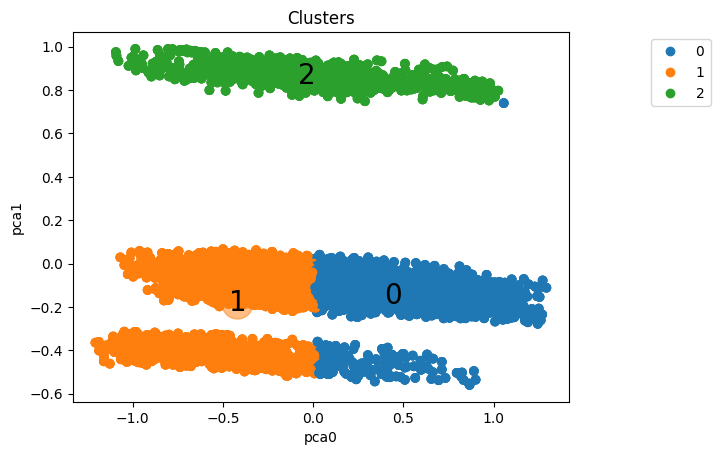

In [122]:
# plotando os pontos correspondentes a cada acidente aeronáutico em torno do seu centróide permitindo uma visualização
# gráfico da distribuição dos dados dentro de cada cluster
plot_clusters_2D(
    dataframe=df_pca,
    columns=df_pca.columns,
    n_colors=3,
    centroids=centroids,
    show_points=True,
    column_clusters=df_clustered["cluster"]
)

In [123]:
# concatenando os dados originais com os dados transformados utilizados na clusterização e mais a coluna de clusters
df_clustered = pd.concat([df_quality, df_clustered], axis=1)

In [124]:
# verificando as primeiras linhas do dataframe com todos os dados utilizados no projeto
df_clustered.head(5)

CO_hr  C6H6_micgr_m3_hr  NMHC_hr  NOx_ppb_hr  NOx_hr  NO2_micgr_m3_hr  \
0  1473.0              14.3   1127.0       224.0   831.0            152.0   
1  1379.0              12.5   1068.0       171.0   899.0            139.0   
2  1385.0              12.2   1056.0       149.0   891.0            133.0   
3  1379.0              13.1   1087.0       137.0   901.0            126.0   
4  1322.0              14.4   1129.0       149.0   934.0            128.0   

   NO2_hr   O3_hr  temperatura°C  umidade_relativa  umidade_absoluta  \
0  1752.0  1568.0           20.8              34.4            0.8365   
1  1663.0  1374.0           23.8              28.2            0.8219   
2  1648.0  1268.0           24.2              28.7            0.8515   
3  1660.0  1144.0           25.2              24.9            0.7829   
4  1639.0  1109.0           27.0              17.8            0.6275   

   dia_semana  hour  cluster  one-hot__dia_semana_0.0  \
0         3.0  11.0        0                      0.0   
1         3.0  12.0        0                      0.0   
2         3.0  13.0        0                      0.0   
3         3.0  14.0        0                      0.0   
4         3.0  15.0        0                      0.0   

   one-hot__dia_semana_1.0  one-hot__dia_semana_2.0  one-hot__dia_semana_3.0  \
0                      0.0                      0.0                      1.0   
1                      0.0                      0.0                      1.0   
2                      0.0                      0.0                      1.0   
3                      0.0                      0.0                      1.0   
4                      0.0                      0.0                      1.0   

   one-hot__dia_semana_4.0  one-hot__dia_semana_5.0  one-hot__dia_semana_6.0  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   one-hot__hour_0.0  one-hot__hour_1.0  one-hot__hour_2.0  one-hot__hour_4.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   one-hot__hour_5.0  one-hot__hour_6.0  one-hot__hour_7.0  one-hot__hour_8.0  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   one-hot__hour_9.0  one-hot__hour_10.0  one-hot__hour_11.0  \
0                0.0                 0.0                 1.0   
1                0.0                 0.0                 0.0   
2                0.0                 0.0                 0.0   
3                0.0                 0.0                 0.0   
4                0.0                 0.0                 0.0   

   one-hot__hour_12.0  one-hot__hour_13.0  one-hot__hour_14.0  \
0                 0.0                 0.0                 0.0   
1                 1.0                 0.0                 0.0   
2                 0.0                 1.0                 0.0   
3                 0.0                 0.0                 1.0   
4                 0.0                 0.0                 0.0   

   one-hot__hour_15.0  one-hot__hour_16.0  one-hot__h

In [125]:
# salvando os dados originais, transformados e clusters em arquivo 
df_clustered.to_csv("arquivos_tratados/df_quality_clustered.csv", index=False)

In [126]:
# salvando o modelo de geração de clusters em arquivo .pkl
import joblib
joblib.dump(kmeans_air_quality, "modelos/kmeans_air_quality_df_quality.pkl")

['modelos/kmeans_air_quality_df_quality.pkl']